In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [59]:
dataset = pd.read_csv("california_housing_train.csv")
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [60]:
stats = dataset.describe()
stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


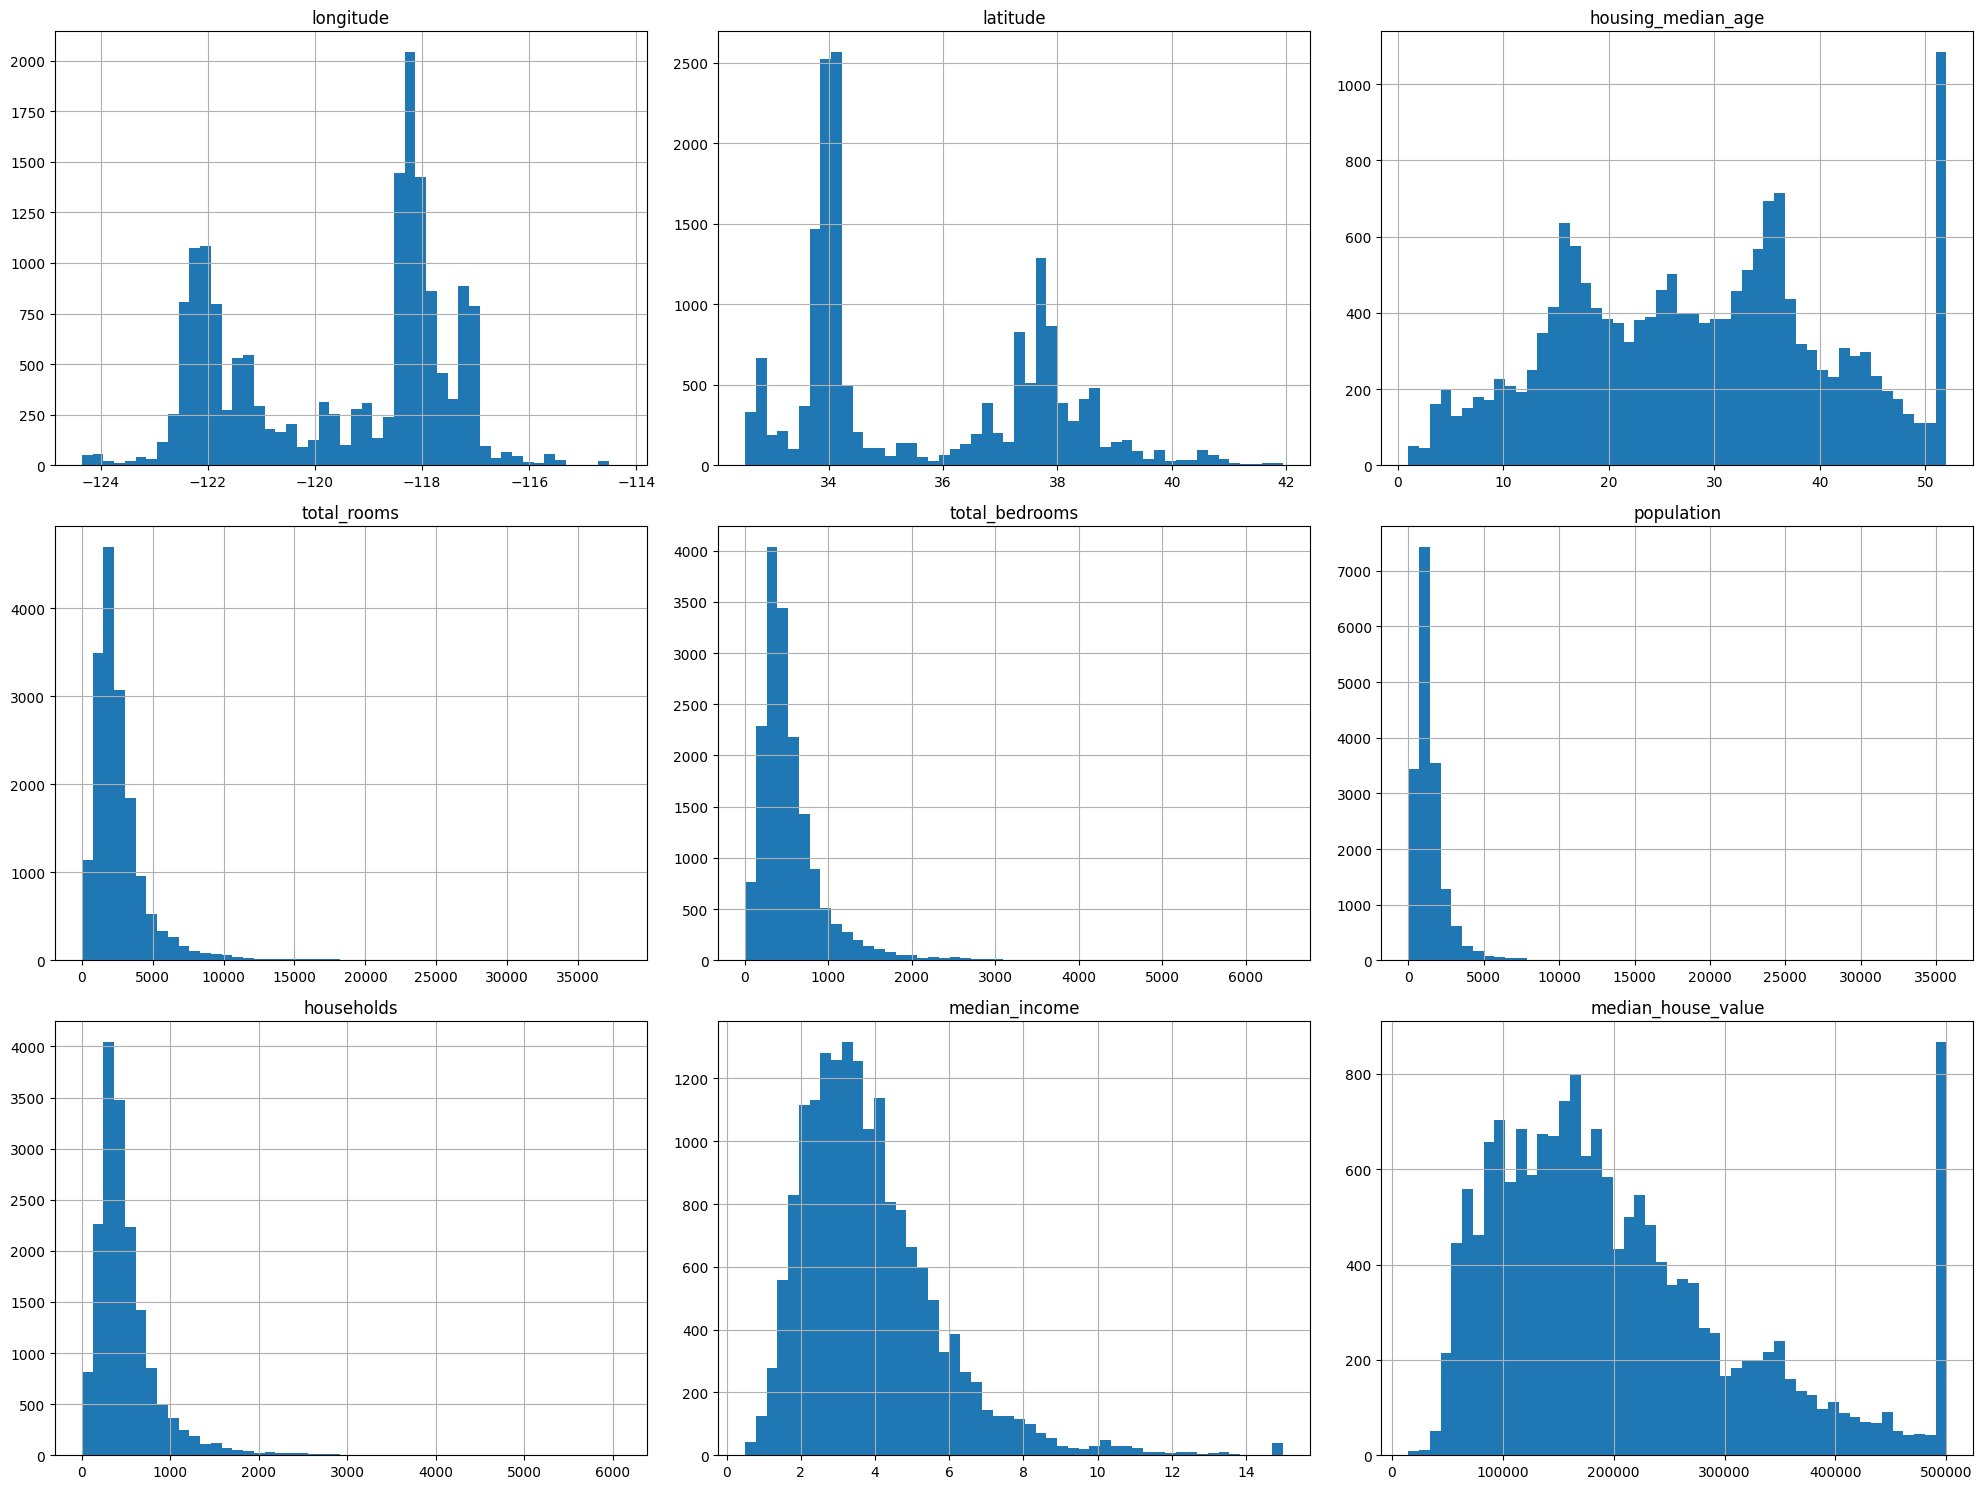

In [61]:
# Визуализация распределения каждого признака через гистограммы
dataset.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()


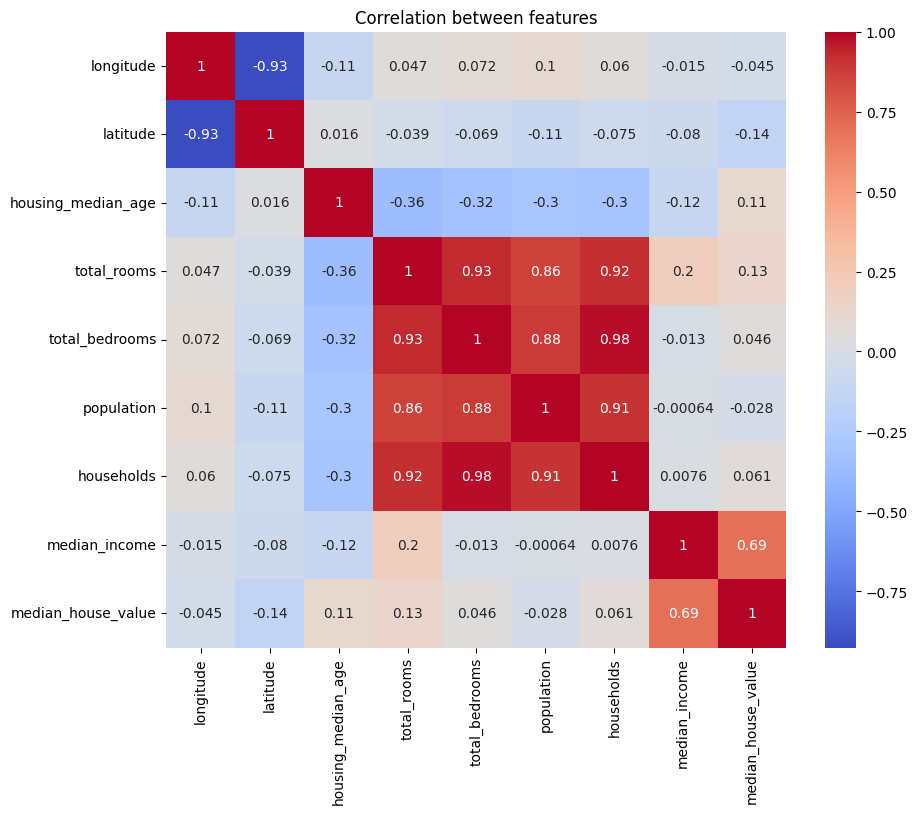

In [62]:
# Тепловая карта корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()


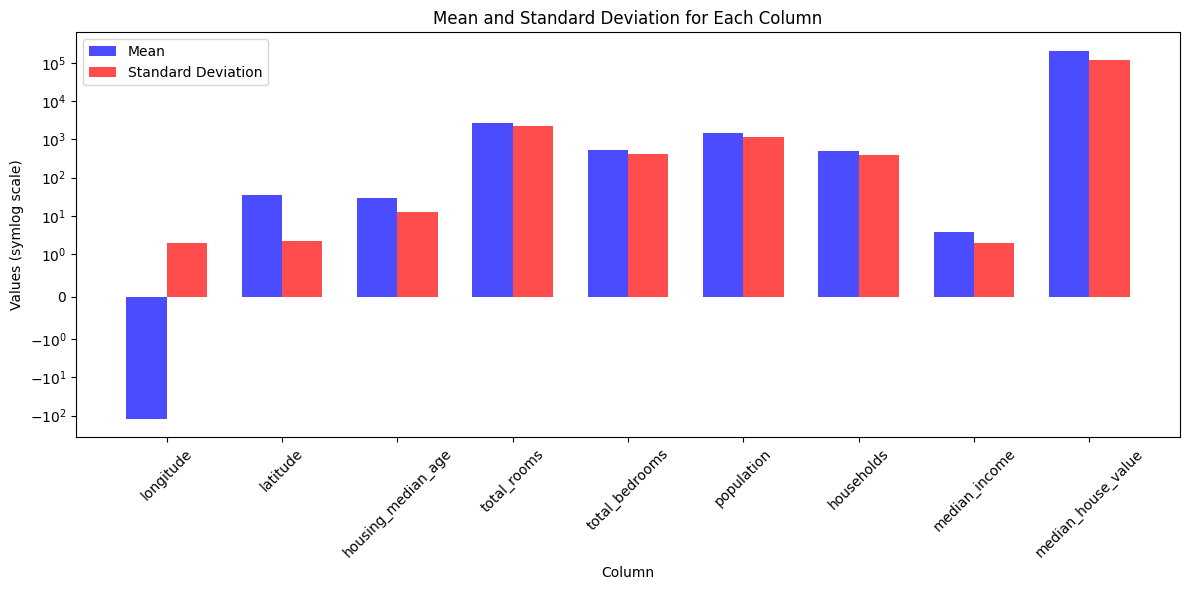

In [63]:
# Среднее значение и стандартное отклонение
mean_values = stats.loc['mean']
std_values = stats.loc['std']

# Визуализация среднего значения и стандартного отклонения с симметричной логарифмической шкалой
plt.figure(figsize=(12, 6))
index = np.arange(len(mean_values))
bar_width = 0.35

plt.bar(index, mean_values, bar_width, label='Mean', alpha=0.7, color='b')
plt.bar(index + bar_width, std_values, bar_width, label='Standard Deviation', alpha=0.7, color='r')

# Симметричная логарифмическая шкала для оси Y
plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values (symlog scale)')
plt.title('Mean and Standard Deviation for Each Column')
plt.xticks(index + bar_width / 2, mean_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


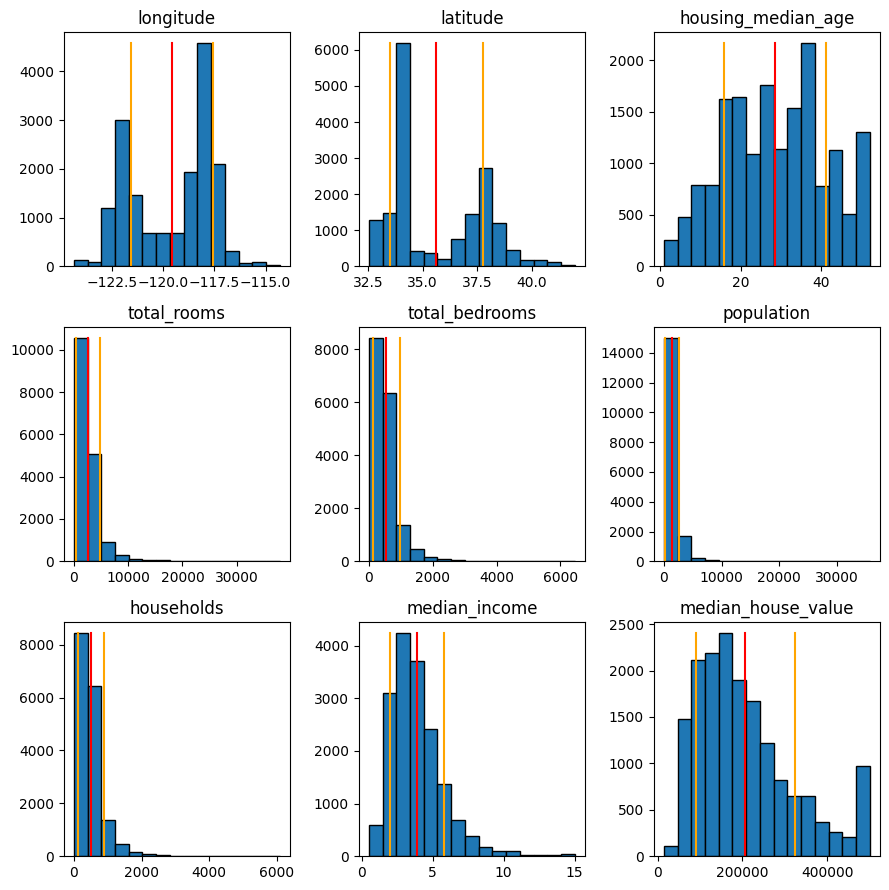

In [64]:
X = dataset.drop(columns=["median_house_value"])
y = dataset["median_house_value"]
rows_count = X.shape[0]

bins_count = 1 + int(math.log(rows_count, 2)) #стeрджес

data_from = X.join(y)
titles = data_from.columns
fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
  ax = fig.add_subplot(3, 3, i + 1)

  hist = ax.hist(data_from[column], bins = bins_count, edgecolor = "black")

  ax.plot([mean_values.iloc[i], mean_values.iloc[i]], [0, np.max(hist[0])], color = "red")
  ax.plot([mean_values.iloc[i] - std_values.iloc[i], mean_values.iloc[i] - std_values.iloc[i]], [0, np.max(hist[0])], color = "orange")
  ax.plot([mean_values.iloc[i] + std_values.iloc[i], mean_values.iloc[i] + std_values.iloc[i]], [0, np.max(hist[0])], color = "orange")

  ax.set_title(titles[i], fontsize=12)


fig.tight_layout()
plt.show()

In [65]:
print("Average values for each column:")
print(mean_values)
print("The standard deviation for each column:")
print(std_values)

Average values for each column:
longitude               -119.562108
latitude                  35.625225
housing_median_age        28.589353
total_rooms             2643.664412
total_bedrooms           539.410824
population              1429.573941
households               501.221941
median_income              3.883578
median_house_value    207300.912353
Name: mean, dtype: float64
The standard deviation for each column:
longitude                  2.005166
latitude                   2.137340
housing_median_age        12.586937
total_rooms             2179.947071
total_bedrooms           421.499452
population              1147.852959
households               384.520841
median_income              1.908157
median_house_value    115983.764387
Name: std, dtype: float64


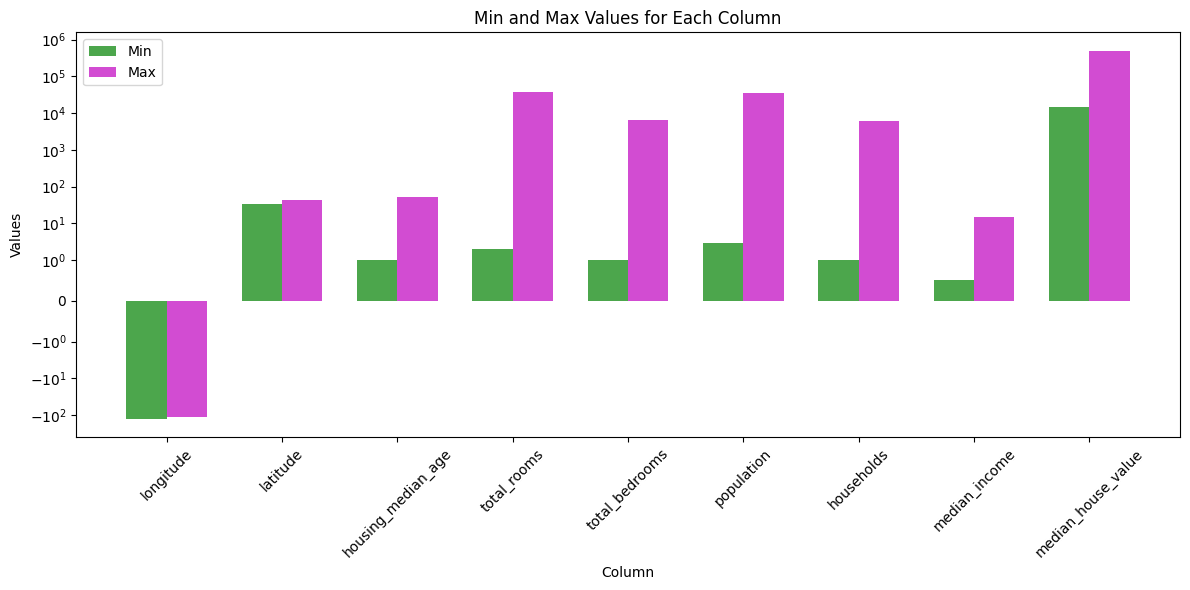

In [66]:
# Минимум и максимум
min_values = stats.loc['min']
max_values = stats.loc['max']

# Визуализация минимума и максимума
plt.figure(figsize=(12, 6))
plt.bar(index, min_values, bar_width, label='Min', alpha=0.7, color='g')
plt.bar(index + bar_width, max_values, bar_width, label='Max', alpha=0.7, color='m')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column')
plt.xticks(index + bar_width / 2, min_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
print("Minimum values for each column:")
print(min_values)
print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
Name: min, dtype: float64

Maximum values for each column:
longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            37937.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
Name: max, dtype: float64


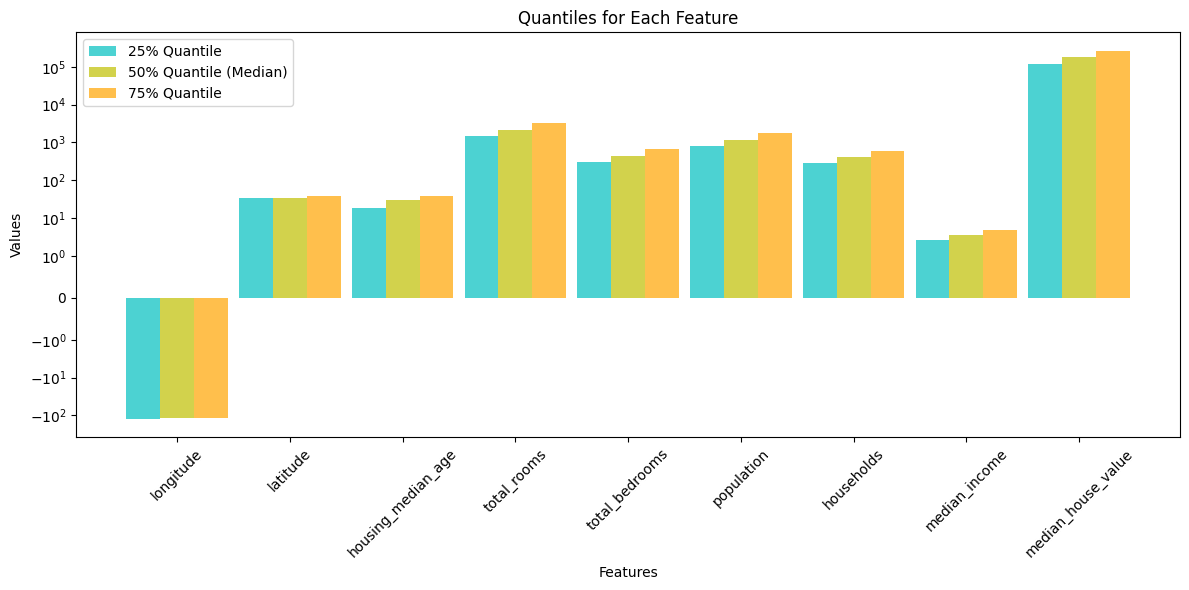

In [68]:
# Квантили 25%, 50% (медиана), 75%
q25_values = stats.loc['25%']
q50_values = stats.loc['50%']
q75_values = stats.loc['75%']

index = np.arange(len(q25_values))  # Делаем индекс на основе количества квантилей

bar_width = 0.3  # Ширина бара

# Визуализация квартилей
plt.figure(figsize=(12, 6))
plt.bar(index, q25_values, bar_width, label='25% Quantile', alpha=0.7, color='c')
plt.bar(index + bar_width, q50_values, bar_width, label='50% Quantile (Median)', alpha=0.7, color='y')
plt.bar(index + 2 * bar_width, q75_values, bar_width, label='75% Quantile', alpha=0.7, color='orange')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Quantiles for Each Feature')
plt.xticks(index + bar_width, q25_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [69]:
quantiles = dataset.quantile([0.25, 0.50, 0.75])
print("Квантили для каждого столбца (25%, 50%, 75%):")
print(quantiles)

Квантили для каждого столбца (25%, 50%, 75%):
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0.25    -121.79     33.93                18.0      1462.00          297.00   
0.50    -118.49     34.25                29.0      2127.00          434.00   
0.75    -118.00     37.72                37.0      3151.25          648.25   

      population  households  median_income  median_house_value  
0.25       790.0      282.00       2.566375            119400.0  
0.50      1167.0      409.00       3.544600            180400.0  
0.75      1721.0      605.25       4.767000            265000.0  


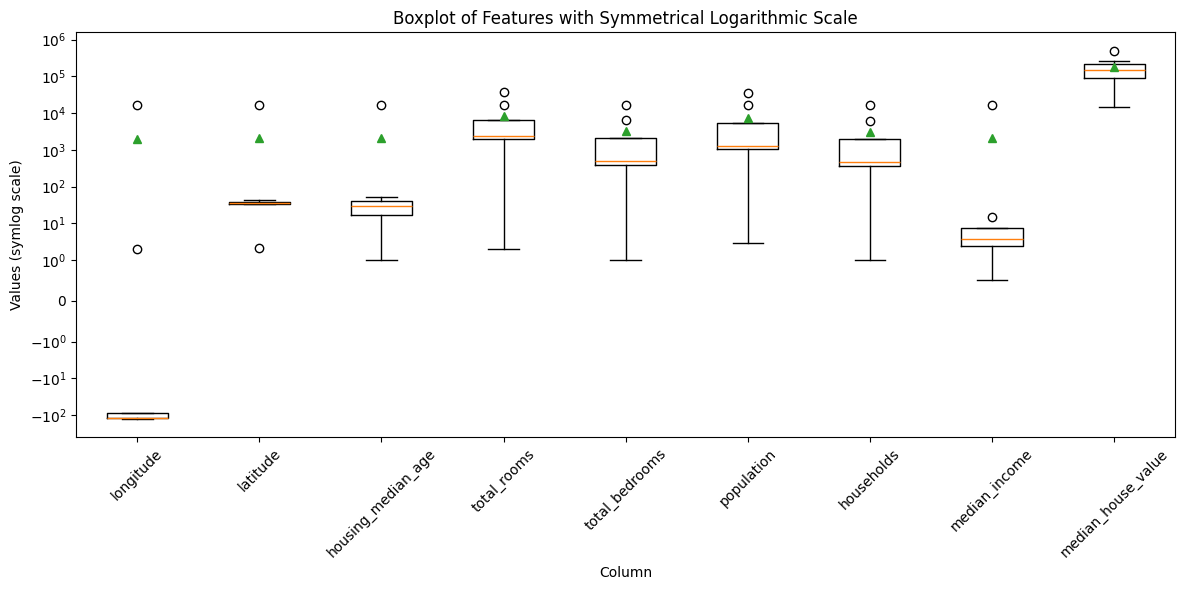

In [70]:
plt.figure(figsize=(12, 6))
plt.boxplot([stats[col] for col in stats.columns], tick_labels=stats.columns, showmeans=True)

plt.yscale('symlog', linthresh=1)  # Симметричная логарифмическая шкала с линейным порогом в 1
plt.xlabel('Column')
plt.ylabel('Values (symlog scale)')
plt.title('Boxplot of Features with Symmetrical Logarithmic Scale')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Обработка отсутствующих значений

In [71]:
dataset.info()
# Проверка отсутствующих значений 
print("The number of missing values in each column:")
print(dataset.isna().sum())
# Если есть отсутствующие значения, можно заполнить их медианными значениями 
dataset.dropna(how='any', inplace=True)
# dataset.fillna(dataset.median(), inplace=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
The number of missing values in each column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [72]:
# Функция для заполнения пропущенных значений медианой (для числовых данных)
def fill_missing_with_median(data):
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']: 
            median_value = data[column].median() 
            data[column] = data[column].fillna(median_value)  
    return data

data_filled = fill_missing_with_median(dataset.copy())

Кодирование категориальных признаков

In [73]:
def label_encode(data):
    for column in data.columns:
        if data[column].dtype == 'object':  
            unique_vals = data[column].unique()  
            val_map = {val: idx for idx, val in enumerate(unique_vals)}  
            data[column] = data[column].map(val_map)  
    return data

data_encoded = label_encode(data_filled.copy())

Нормализация данных

<br>
<img src="./image copy.png" width="100" height="auto">

In [74]:
# Функция для нормализации данных (приведение к диапазону [0, 1])
def min_max_normalize(data):
    for column in data.columns:
        if data[column].dtype in ['float64', 'int64']:  
            min_val = data[column].min()
            max_val = data[column].max()
            if max_val - min_val != 0: 
                data[column] = (data[column] - min_val) / (max_val - min_val)
            else:
                data[column] = 0  
    return data

data_normalized = min_max_normalize(data_encoded.copy())

print("Предварительно обработанные данные:")
print(data_normalized.head())

Предварительно обработанные данные:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.000000  0.175345            0.274510     0.147885        0.198945   
1   0.984064  0.197662            0.352941     0.201608        0.294848   
2   0.975100  0.122210            0.313725     0.018927        0.026847   
3   0.974104  0.116897            0.254902     0.039515        0.052142   
4   0.974104  0.109458            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  
0    0.028364    0.077454       0.068530            0.107012  
1    0.031559    0.075974       0.091040            0.134228  
2    0.009249    0.019076       0.079378            0.145775  
3    0.014350    0.037000       0.185639            0.120414  
4    0.017405    0.042921       0.098281            0.104125  


Разделение данных на обучающую и тестовую выборки

In [75]:
train_size = int(0.8 * len(data_normalized))
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [76]:
# Отделяем целевую переменную и признаки
X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

Реализация линейной регрессии с методом наименьших квадратов

In [77]:
class LinearRegression:
    def fit(self, X, y):
        # Добавляем свободный член (базис) в X
        X_b = [[1] + list(row) for row in X.values]  # Добавляем x0 = 1
        self.theta = [0] * len(X_b[0])  # Инициализация коэффициентов

        # Установка параметров градиентного спуска
        learning_rate = 0.1  # Увеличиваем скорость обучения
        n_iterations = 100  # Уменьшаем количество итераций
        m = len(y)

        for iteration in range(n_iterations):
            y_pred = self.predict(X)  # Предсказания на текущем этапе
            errors = [y_pred[i] - y[i] for i in range(m)]  # Вычисление ошибок
            
            for j in range(len(self.theta)):
                # Обновление коэффициентов с использованием ошибок
                gradient = sum(errors[i] * X_b[i][j] for i in range(m)) / m
                self.theta[j] -= learning_rate * gradient

    def predict(self, X):
        X_b = [[1] + list(row) for row in X.values]  # Добавляем x0 = 1
        predictions = []
        for row in X_b:
            prediction = sum(row[j] * self.theta[j] for j in range(len(row)))
            predictions.append(prediction)
        return predictions


Построение трех моделей с различными наборами признаков

In [83]:
# Модель 1: Используем все признаки
model1 = LinearRegression()
model1.fit(X_train, y_train)
predictions1 = model1.predict(X_test)

# Модель 2: Используем только 2 признака
model2 = LinearRegression()
X_train_model2 = X_train[['total_rooms', 'median_income']]
X_test_model2 = X_test[['total_rooms', 'median_income']]
model2.fit(X_train_model2, y_train)
predictions2 = model2.predict(X_test_model2)

# Модель 3: Используем 3 признака
model3 = LinearRegression()
X_train_model3 = X_train[['total_rooms', 'median_income', 'population']]
X_test_model3 = X_test[['total_rooms', 'median_income', 'population']]
model3.fit(X_train_model3, y_train)
predictions3 = model3.predict(X_test_model3)


Оценка производительности каждой модели
<br>
<img src="./image.png" width="100" height="auto">



In [84]:
# Функция для расчета R²
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Оценка моделей
r2_model1 = r_squared(y_test, predictions1)
r2_model2 = r_squared(y_test, predictions2)
r2_model3 = r_squared(y_test, predictions3)

print(f'Коэффициент детерминации для модели 1: {r2_model1:.4f}')
print(f'Коэффициент детерминации для модели 2: {r2_model2:.4f}')
print(f'Коэффициент детерминации для модели 3: {r2_model3:.4f}')


Коэффициент детерминации для модели 1: -0.0641
Коэффициент детерминации для модели 2: 0.0547
Коэффициент детерминации для модели 3: 0.0544


Сравнение результатов трех моделей

Бонусное задание: Введение синтетического признака

In [80]:
X_train['synthetic_feature'] = X_train['total_rooms'] * X_train['median_income']
X_test['synthetic_feature'] = X_test['total_rooms'] * X_test['median_income']

model_bonus = LinearRegression()
X_train_bonus = X_train[['total_rooms', 'median_income', 'synthetic_feature']]
X_test_bonus = X_test[['total_rooms', 'median_income', 'synthetic_feature']]
model_bonus.fit(X_train_bonus, y_train)
predictions_bonus = model_bonus.predict(X_test_bonus)

r2_bonus = r_squared(y_test, predictions_bonus)
print("Коэффициент детерминации для модели с синтетическим признаком:",r2_bonus)


Коэффициент детерминации для модели с синтетическим признаком: 0.05568905146278358
